# BT01: Tìm hiểu thư viện NetworkX

Họ tên: Đào Đức Anh

MSSV: 1712270

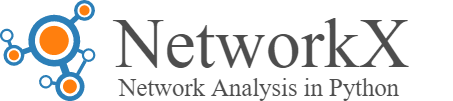

# NetworkX
</br>NetworkX là một package Python cho việc tạo, thao tác và nghiên cứu về cấu trúc, dynamics và chức năng của mạng phức tạp (Đồ thị thực)




- Cấu trúc dữ liệu cho các đồ thị, đồ thị có hướng và đa đồ thị
- Nhiều thuật toán đồ thị cơ bản
- Cấu trúc mạng và phân tích độ đo
- Generator cho đồ thị cơ bản, đồ thị ngẫu nhiên và mạng tổng hợp
- Các Node có thể là bất cứ thứ gì (ví dụ: text, ảnh, bản ghi XML,...)
- Cạnh có thể lưu trữ dữ liệu bất kỳ (ví dụ: trọng số, time-serries,...)
- Open source 3-clause BSD license
- Có các lợi ích từ Python như khai báo đơn giản, dễ tìm hiểu và multi-platform

## Cài Đặt Network X
NetworkX yêu cầu có môi trường python 3.6, 3.7 hoặc 3.8
<br> Đầu tiên, ta phải đảm bảo có phiên bản mới nhất của pip đã được cài đặt.



In [1]:
! pip install --upgrade pip
! pip install networkx


  Attempting uninstall: pip
    Found existing installation: pip 20.2.3
    Uninstalling pip-20.2.3:
      Successfully uninstalled pip-20.2.3


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-uninstall-u59o9239\\pip.exe'
Consider using the `--user` option or check the permissions.



In [2]:
import networkx as nx


## Khởi tạo Đồ thị
<br> Khởi tạo một Graph chưa có cạnh và đỉnh nào


In [3]:
G = nx.Graph()


Theo định nghĩa, một đồ thị là 1 tập hợp các node với các thuộc tính giữa 2 cặp đỉnh bất kỳ. Trong NetworkX, các nodes có thể là bất kỳ hashable object ví dụ như một chuỗi văn bản, một hình ảnh, một đối tượng XML, hoặc một đồ thị khác, hay là một đối tượng đỉnh được tự định nghĩa, vv...

## nodes

Đồ thị ```G``` có thể được xây dựng bằng nhiều cách. NetworkX bao gồm nhiều hàm generator cho đồ thị và hỗ trợ đọc và ghi đồ thị trong nhiều format. Dễ dàng ta có thể thêm từng node vào đồ thị như sau:

In [4]:
G.add_node(1)

hoặc thêm từ bất kỳ iterable container ví dụ như list


In [5]:
G.add_nodes_from([2, 3])

Ta cũng có thể thêm các node cùng với các thuộc tính của node nếu container trả về 2-tuples theo mẫu ```(node,node_attribute_dict)```

In [6]:
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])


Các thông tin thêm về các thuộc tính của các đỉnh được thảo luận ở [đây](https://networkx.github.io/documentation/stable/tutorial.html#attributes)


Đỉnh từ một đồ thị có thể được kết hợp cùng với nhau:

In [7]:
H = nx.path_graph(10)
G.add_nodes_from(H)


```G``` bây giờ chứa các node của H như là node của G. Trong khi đó ta có thể sử dụng đồ thị H như là một Node trong ```G```

In [8]:
G.add_node(H)


Đồ thị `G` bây giờ chứa `H` như là 1 đỉnh. Khả năng flexible này thì rất mạnh mẽ vì nó cho phép các đồ thị của đồ thị, đồ thị của các file, đồ thị của các hàm và hơn nữa. Nó còn thực sự mạnh mẽ khi suy nghĩ làm thế nào để cấu trúc ứng dụng của chúng ta do đó các đỉnh của ta có thể là các đối tượng có ý nghĩa đặc biệt riêng cho từng ngữ cảnh của bài toán.

## Edges
`G` có thể còn được thêm vào đồ thị bằng cách thêm các một cạnh một lúc.

In [9]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e) 



hay bằng cách t thêm 1 list các cạnh

In [10]:
G.add_edges_from([(1, 2), (1, 3)])


hoặc thêm bất kỳ ebunch các cạnh. Một ebunch là bất kỳ iterable container của các tuple cạnh. một tuple cạnh có thể là 2-tuple của đỉnh hoặc 3-tuple với 2 đỉnh theo sau là các từ điển thuộc tính của cạnh ví dụ  `(2, 3, {'weight': 3.1415})`

In [11]:
G.add_edges_from([(2, 3, {'weight': 3.1415})])

Hoặc ta cũng có thể thêm các cạnh từ một đồ thị trước đó

In [12]:
G.add_edges_from(H.edges)

Không có sự trùng lặp khi ta thêm một đỉnh hay cạnh trước đó. Ví dụ ta sẽ xóa hết các cạnh và đỉnh và hiện tại

In [13]:
G.clear()

Ta thêm một vài đỉnh và cạnh và NetworkX đơn giản bỏ qua bất kỳ đỉnh và cạnh đã có mặt trong đồ thị

In [14]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

In [15]:
print('num of nodes: ',G.number_of_nodes())

print('num of edges: ',G.number_of_edges())

num of nodes:  8
num of edges:  3


## Truy xuất càng phần tử của đồ thị

Ta có thể kiểm tra các đỉnh và các cạnh hiện có trong đồ thi.4 thuộc tính cơ bản để kiểm tra các đồ thị: `G.nodes`, `G.edges`, `G.adj` và `G.degree`. Có một vài  khung hình của các đỉnh và cạnh, các đỉnh kề và bậc của các đỉnh trong đồ thị. Nó cho phép liên tục được cập nhật vào khung hình read-only vào cấu trúc đồ thị. Nó cũng có dict-like trong đó mà ta có thể tra cứu dự liệu về thuộc tính của đỉnh và cạnh thông qua các khung hình và lặp với việc sử dụng phước thức `.item()`, `.data('span')`. 

In [16]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [17]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [18]:
list(G.adj[1])  # or list(G.neighbors(1))

[2, 3]

In [19]:

G.degree[1] 

2


một cách khác ta có thể kiểm tra bậc và các cạnh của từ một tập của các đỉnh sử dụng một nbunch. một nbunch là một trong những: None (có nghĩa là tất cả các đỉnh), một đỉnh, hoặc một iterable container hoặc các đỉnh mà là không phải một node trong một đồ thị.

In [20]:
G.edges([2, 'm'])

EdgeDataView([(2, 1), ('m', 3)])

In [21]:
G.degree([2, 3])


DegreeView({2: 1, 3: 2})

## Xóa các phần tử khỏi đồ thị

Ta có thể xóa các đỉnh và các cạnh từ đồ thị tương tự như việc thêm vào đồ thị. sử dụng phương thức `Graph.remove_node()`, `Graph.remove_nodes_from()`, `Graph.remove_edge()` và `graph.remove_edges_from()`.

In [22]:
G.remove_node(2)
G.remove_nodes_from("spam")
print(list(G.nodes))

G.remove_edge(1, 3)

[1, 3, 'spam']


## Sử dụng contructor cho đồ thị
Đối tượng đồ thị không có built up từng bước - dữ liệu định nghĩa cấu trúc đồ thị có thể được truyền một cách trực tiếp vào contructors của các lớp đồ thị. Khi khởi tạo một đồ thị bằng các khai báo một trong những lớp đồ thị bạn có thể định nghĩa dữ liệu trong một vài format. 

In [23]:
G.add_edge(1, 2)
H = nx.DiGraph(G)  # Khởi tạo một đồ thị có hướng từ đồ thị G
list(H.edges())



[(1, 2), (2, 1)]

In [24]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist) # khởi tạo đồ thị từ danh sách các cạnh
list(H.edges())


[(0, 1), (1, 2), (2, 3)]

## Kiểu dữ liệu cho một node hay một cạnh

<br> Các đỉnh và các cạnh không phải là một đối tượng đặc trưng như là đối tượng NetworkX. Điều này cho phép ta đươc sử dụng các đối tượng có ý nghĩa cho các đỉnh và các cạnh. Các lựa chọn phổ biến là số hay chuỗi ký tự nhưng các đỉnh có thể là đối tượng hashable (ngoại trừ None) và các một cạnh có thể kết nối với bất kỳ đối tượng `x` bằng các sử dụng `G.add_edges(n1,n2, object =x)`.
<br> Như ví dụ trên, `n1, n2` có thể là đối tượng proteein từ Ngân hàng dữ liệu protein RCSB và x có thể được suy diễn như là 1 bản ghi XML của các chi tiết publish của các thí nghiệm


## Truy xuất thông tin một cạnh hoặc các đỉnh kề

Ngoài ra, ở các khung hình `Graph.edges` và `Graph.adj` truy cập đến các cạnh và các đỉnh kề là điều có thể khi sử dụng ký hiệu Ngoặc vuông để truyền index

In [25]:
G = nx.Graph([(1, 2, {"color": "yellow"})])

In [26]:
G[1]  # same as G.adj[1]

AtlasView({2: {'color': 'yellow'}})

In [27]:
G[1][2]

{'color': 'yellow'}

In [28]:
G.edges[1, 2]

{'color': 'yellow'}


Ta có thể get/set các thuộc tính của một cạnh khi sử dụng dấu ngoặc vuông nếu cạnh đó đã tồn tại.

In [29]:
G.add_edge(1, 3)

In [30]:
G[1][3]['color'] = "blue"

In [31]:
G.edges[1, 2]['color'] = "red"

In [32]:
G.edges[1, 2]

{'color': 'red'}


Một cách để kiểm tra nhanh tất cả (đỉnh và các đỉnh kề) cặp đó là sử dụng `G.adjacency()` hoặc `G.adj.item()`. Chú ý rằng với đồ thị vô hướng, việc lặp ma trận kề sẽ đi qua các cạnh mỗi cạnh 2 lần.

In [33]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

In [34]:

for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)



một cách thuận tiện cho việc truy xuất đến tất cả các cạnh có được cùng với tính chất của các cạnh

In [35]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


## Thêm thuộc tính cho đồ thị, cho node và các cạnh
<br> Các thuộc tính như là trọng số, nhãn màu hay bất kỳ đối tượng python nào có thể được đính kèm lên đồ thị, đỉnh hay cạnh.
<br> Mỗi đồ thị, đỉnh và cạnh có thể giữ các cặp thuộc tính key/value trong các từ điển thuộc tính kết hợp (các khóa thường hasable). Mặc định thì chúng rỗng, nhưng các thuộc tính có thể được thêm hay thay đổi bằng cách sử dụng `add_edge`, `add_node` hay trực tiếp thao tác của các từ điển thuộc tính được đặt tên `G.named`, `G.nodes`, `G.edges` cho mỗi đồ thị G. 


### Thuộc tính của đồ thị

Gán giá trị cho các thuộc tính đồ thị khi khởi tạo một đồ thị

In [36]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}


Hoặc ta có thể thay đổi các thuộc tính này sau

In [37]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

### Thuộc tính của node
Thêm các thuộc tính cho đỉnh bằng cách sử dụng `add_node()`, `add_node_from()` hoặc `G.nodes`


In [38]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [39]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})


Chú ý rằng việc thêm một đỉnh vào `G.nodes` thì không thêm nó vào đồ thị, sử dụng `G.add_node()` để thêm một đỉnh mới. Tưởng tự cho canhk.

#### Thuộc tính của cạnh
Thêm/thay đổi thuộc tính của cạnh bằng cách sử dụng `add_edge()`, `add_edges_from()` hoặc sử dụng truyền index

In [40]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2


các thuộc tính trọng số đặc biệt nên là số vì nó được sử dụng bởi những thuật toán có yêu cầu trọng số cho các cạnh.

## Đồ thị có hướng
Đồ thị có hướng cung cấp thêm các phương thức và các thuộc tính đặc biệt cho các cạnh có hướng ví dụ: `DiGraph.out_edges`, `DiGraph.in_degree`, `DiGraph.predecessors()`, `Digraph.successors()`,vv.... Để cho phép các thuật toán hoạt động với tất cả các lớp một cách dễ dàng, phiên bản có hướng của `neighbors()`thì tương đồng với succesors(), tổng hợp tổng của in_degree và out_degree cũng tương tự dù rằng đôi khi nó ko nhất quán với nhau.


In [41]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [42]:
DG.degree(1, weight='weight')

1.25

In [43]:
list(DG.successors(1))


[2]

In [44]:
list(DG.neighbors(1))

[2]


Một vài thuật toán chỉ hoạt động với đồ thị có hướng và những loại khác thì không tốt cho đồ thị có hướng. Sự thật thì việc gộp chung đồ thị có hướng và độ thị vô hướng là rất nguy hiểm. Nếu bạn muốn xem một đồ thị có hướng như là một đồ thị vô hướng cho một vài đánh giá thì bạn nên convert nó bằng cách sử dụng `Graph.to_undricted()` hoặc với hàm

In [45]:
H = nx.Graph(G) 

## Đa đò thị

NetworkX cung cấp các lớp cho các đồ thị, cho phép nhiều cạnh giữa 2 cặp đỉnh. Lớp Đa đồ thị và đa đồ thị có hướng cho phép ta thêm cùng 1 cạnh 2 lần, có thể với việc thêm dữ liệu cạnh khác nhau. 


In [46]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [47]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

In [48]:
nx.shortest_path(GG, 1, 3)

[1, 2, 3]

## Graph generators và các phép tính trên đồ thị

Thêm vào đó để có thể xây dựng đồ thị Đỉnh- đỉnh hay cạnh - cạnh nó còn có thể được khởi tạo bằng cách áp dụng những operation đồ thị cơ bản như:
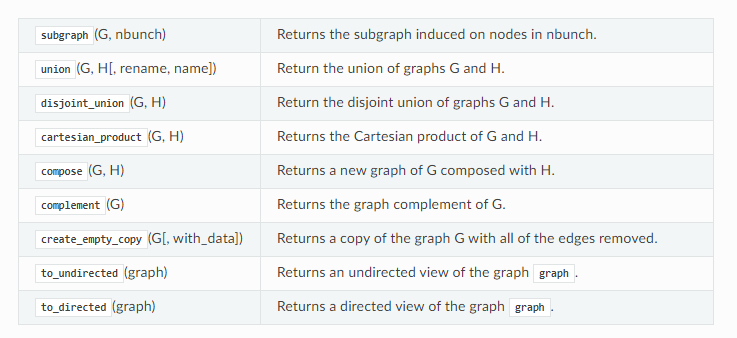

In [49]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

## Phân tích đồ thị 

Cấu trúc của G có thể được phân tích bằng cách sử dụng các hàm lý thuyết đồ thị như là:

In [50]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [51]:
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [52]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}


Một vài hàm với output lớn lặp qua các node, value 2-tuple. Những giá trị này dễ dàng được lưu trữ trong cấu trúc từ điển nếu bạn thích,

In [53]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

## Vẽ đồ thị
NetworkX không phải là một package vẽ đồ thị, nhưng cơ bản có thể vẽ bằng matplotlib cũng như là sử dụng  interface opensource Graphviz software package được bao gồm. Đây là một phần của `networkx.drawing module` và sẽ được thêm vào nếu có thể

Đầu tiên import Matplotlib plot.


In [54]:
import matplotlib.pyplot as plt


Để kiểm tra nếu import networkx.drawing thành công để vẽ G sử dụng một trong những 

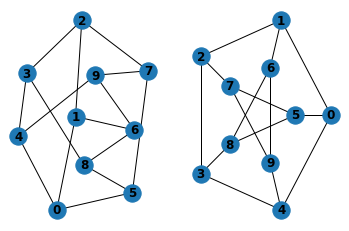

In [55]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')